In [9]:
import numpy as np
import pandas as pd
import ruptures as rpt
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('dark_background')

df = pd.read_csv('data/clean_data.csv')

In [10]:
signal = df['accuracy_1_%'].values
model = rpt.Pelt(model="rbf", min_size=5).fit(signal)
changes_pelt = model.predict(pen=0.1)

changes_pelt = [cp for cp in changes_pelt if cp < len(df)]

In [11]:
indexes = [0] + changes_pelt + [len(signal)-1]

p-value > 0.05 → не отвергаем H₀ (нормальность).

p-value ≤ 0.05 → отвергаем H₀ (ненормальность).

In [12]:
for i in range(len(indexes) - 1):
    data = signal[indexes[i]:indexes[i+1]]
    shapiro_test = stats.shapiro(data)

    print(f"[{indexes[i]}, {indexes[i+1]}] - {shapiro_test.pvalue > 0.05}, W = {shapiro_test.statistic:.3f}")


[0, 20] - True, W = 0.909
[20, 25] - True, W = 0.915
[25, 30] - True, W = 0.938
[30, 35] - True, W = 0.858
[35, 45] - False, W = 0.757
[45, 55] - True, W = 0.919
[55, 65] - True, W = 0.936
[65, 75] - True, W = 0.870
[75, 95] - True, W = 0.934
[95, 105] - True, W = 0.936
[105, 110] - True, W = 0.960
[110, 115] - True, W = 0.881
[115, 135] - True, W = 0.954
[135, 140] - True, W = 0.990
[140, 145] - True, W = 0.949
[145, 150] - True, W = 0.951
[150, 165] - True, W = 0.908
[165, 180] - False, W = 0.756
[180, 185] - True, W = 0.860
[185, 190] - True, W = 0.946
[190, 195] - True, W = 0.991
[195, 200] - True, W = 0.924
[200, 210] - True, W = 0.860
[210, 215] - True, W = 0.961
[215, 225] - True, W = 0.905
[225, 230] - True, W = 0.816
[230, 235] - False, W = 0.747
[235, 240] - True, W = 0.859
[240, 245] - False, W = 0.728
[245, 250] - True, W = 0.902
[250, 255] - True, W = 0.908
[255, 260] - True, W = 0.849
[260, 265] - True, W = 0.945
[265, 270] - True, W = 0.989
[270, 280] - True, W = 0.976
[

W - уверенность в результате [0,1]

In [13]:
shapiro_test = stats.shapiro(signal)
print(f"Shapiro-Wilk test: W={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")

Shapiro-Wilk test: W=0.906, p-value=0.000


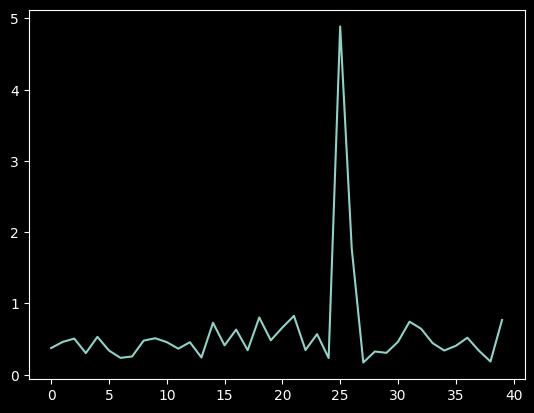

In [14]:
# stds = []
# for i in range(len(indexes) - 1):
#     data = signal[indexes[i]:indexes[i+1]]

#     stds += []

#     #print(f"{data.std():.3f}")

stds = [signal[indexes[i]:indexes[i+1]].std() for i in range(len(indexes) - 1)]

plt.plot(stds)

Тест Уэлча для проверки значимости в различии средних соседних выборок (при различной дисперсии)

Тест Бартлетт для проверки значимости в различии дисперсий соседних выборок

In [15]:
significant_diff = []

for i in range(len(indexes) - 2):
    data1 = signal[indexes[i]:indexes[i+1]]
    data2 = signal[indexes[i+1]:indexes[i+2]]

    if (stats.ttest_ind(data1, data2, equal_var=False).pvalue > 0.05) \
        and (stats.bartlett(data1, data2).pvalue > 0.05):

        significant_diff.append(indexes[i+1])


    # print(f"{indexes[i+1]} \
    #        - mean: {stats.ttest_ind(data1, data2, equal_var=False).pvalue > 0.05} \
    #        - std: {stats.bartlett(data1, data2).pvalue > 0.05} \
    #        ")

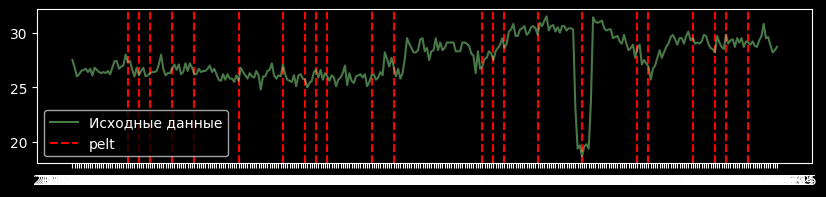

In [16]:
plt.figure(figsize=(10, 2))
plt.plot(df['date'], df['accuracy_1_%'], alpha=0.5, color='lightgreen', label='Исходные данные', zorder=2)

# for window_size in [14]:
#     df['smoothed'] = df['accuracy_1_%'].rolling(window=window_size).mean()
#     plt.plot(df['date'], df['smoothed'], linewidth=2, color='skyblue', 
#             label=f'Скользящее среднее (окно {window_size})', zorder=3)

significant_diff = [cp for cp in significant_diff if cp < len(df)]

for cp in significant_diff:
    plt.axvline(df['date'].iloc[cp], color="red", 
                linestyle='--', zorder=1, 
                label="pelt" if cp == significant_diff[0] else "")

plt.legend()